# Bomane Yangwa (Aruwimi)

*Bemerkungen*

Bislang ist der Fundort nicht vorgelegt, lediglich ein Vorbericht von Livingstone Smith *et al.* (2011) ist publiziert. Darüber hinaus gibt es noch eine  Reihe von Fotos der Keramik, die Livingstone Smith 2010 herumgeschickt hat. Ich selbst habe das Material 2014 in Tervuren gesehen und einigen (nicht genehmigte) Fotos gemacht.

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

con = sqlite3.connect("../data/CongoDB.sqlite")

Befund YNG 2010/II in Bomane Yangwa am Aruwimi:

## Fundort und Befunde

In [2]:
sql = """SELECT
           t_Ort.ort_name, 
           t_Ort.y_Lat AS N,
           t_Ort.x_long AS E,
           t_Ort.ort_kurz,
           t_Komplex.bef_nr, 
           t_Komplex.bef_art 
       FROM t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID
       WHERE (((t_Ort.ort_name) Like '%Bomane%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,ort_name,N,E,ort_kurz,bef_nr,bef_art
0,Bomane Yangwa,1.281561,23.745473,YNG,2010/II,Grube


## Keramik

In [3]:
sql = """SELECT
           t_Ort.ort_kurz, 
           t_Komplex.bef_nr, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_name) Like '%Bomane%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,ort_kurz,bef_nr,Individuum,Typ,Art,Tiefe
0,YNG,2010/II,A,None,K,None
1,YNG,2010/II,B,None,K,None
2,YNG,2010/II,C,None,K,None
3,YNG,2010/II,D,None,K,None
4,YNG,2010/II,E,None,K,None


### Abmessungen der Gefäße

In [4]:
sql = """SELECT
           t_Obj.objID,
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_name) Like '%Bomane%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

display(df)

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:21: FutureWarning: convert_objects 

,objID,Ind,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD
0,6323,YNG 2010/II:A,None,None,NaN,NaN,NaN,NaN,NaN
1,6324,YNG 2010/II:B,None,None,NaN,NaN,NaN,NaN,NaN
2,6325,YNG 2010/II:C,None,None,NaN,NaN,NaN,NaN,NaN
3,6326,YNG 2010/II:D,,,10,16,16,11,7
4,6327,YNG 2010/II:E,None,None,NaN,NaN,13,8,NaN


> **ToDo:** in R mit potplot zeichnen lassen?
>> *macht eigentlich keinen Sinn, da keine vollständigen Maße vorliegen*

### Verzierungselemente

In [5]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM ((t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID) t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_Ort.ort_name) Like '%Bomane%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [6]:
df_pivot = df.pivot_table(values = 't_Obj.objID', index = 'pos', columns = 't_K_Verz.verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
df_pivot

t_K_Verz.verzName,01.7,01.8,02.1,02.2,04.1,04.18
pos,,,,,,
5 Schulter,1,1,3,1,0,1
6 Bauch,0,2,1,1,2,0
8 Bodenansatz,0,0,0,0,1,0
9 Standfl,0,0,0,0,1,0


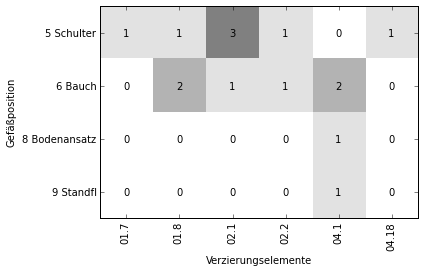

In [7]:
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

## <sup>14</sup>C-Daten

*Wichtig:*

**Das 14C-Datum ist bislang nicht publiziert (Stand 30.12.2014)!** Livingstone Smith zeigte mir die Datenblätter inkl. dieser Datierung im Oktober 2014 bei einem Besuch in Tervuren.

In [2]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           t_14C.SPECIES,
           [t_Ort].[ort_name] AS SITE, 
           [t_Komplex].[bef_art] AS CULTURE, 
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] AS PHASE,
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE (((t_Ort.ort_name) Like '%Bomane%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,LABNR,C14AGE,C14STD,C13,MATERIAL,SPECIES,SITE,CULTURE,PHASE,COUNTRY,LATITUDE,LONGITUDE
0,Poz-39122,2110,35,0,None,None,Bomane Yangwa,Grube,YNG 2010/II,COD,1.281561,23.745473


# Interpretation

Das Material unterscheidet sich eindeutig von Imbonga sowie allem anderen mir aktuell bekannten – inkl. Batalimo-Maluba? Es ist jedoch zeitgleich zu den bislang bekannten frühesten keramischen Stilgruppen in der Region und scheint eine weitere, unabhängige Besiedlungsgang des Regenwaldes zu repräsentieren.